<a href="https://colab.research.google.com/github/MSamhitha/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

This project focuses on predicting bike rental demand using machine learning techniques. We begin by conducting exploratory data analysis (EDA) to gain insights into the data, such as the impact
of seasons, holidays, temperature, humidity, and other factors on bike rentals. EDA    helps us understand the dataset and identify patterns that will be valuable for modeling.

Next, we explore various machine learning models, including Linear Regression, Ridge Regression, Lasso Regression, and Random Forest Regression, to determine which one performs best in predicting bike rentals. We also employ hyperparameter optimization techniques to fine-tune the models and improve their accuracy.

The analysis reveals that the Random Forest (CV) model outperforms other models, providing the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the highest R-squared (R2) score. This model becomes our preferred choice for forecasting bike rentals.

The insights gained from our analysis not only help in building an accurate predictive model but also offer valuable information for bike rental service providers. They can use these findings to plan their resources, adjust pricing strategies, and optimize their services based on seasonal and weather-related patterns. This project contributes to enhancing the efficiency and customer satisfaction of bike rental services in the city.




# **Problem Statement**


**The problem at hand is to predict the demand for bike rentals in South korea based on various environmental and temporal factors. This prediction is valuable for bike rental service providers to optimize their operations, manage inventory efficiently, and meet customer demand effectively. To address this problem, we have historical data on bike rentals along with information on weather conditions, holidays, and time of day. The goal is to build a machine learning model that can accurately forecast the number of bike rentals, considering these influencing factors.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Specify the encoding (e.g., 'utf-8', 'ISO-8859-1', 'cp1252', etc.)
encoding = 'ISO-8859-1'  # Replace with the appropriate encoding for your file

# Read the CSV file with the specified encoding
df = pd.read_csv('/content/drive/MyDrive/DATAS/SeoulBikeData.csv', encoding=encoding)


### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

0

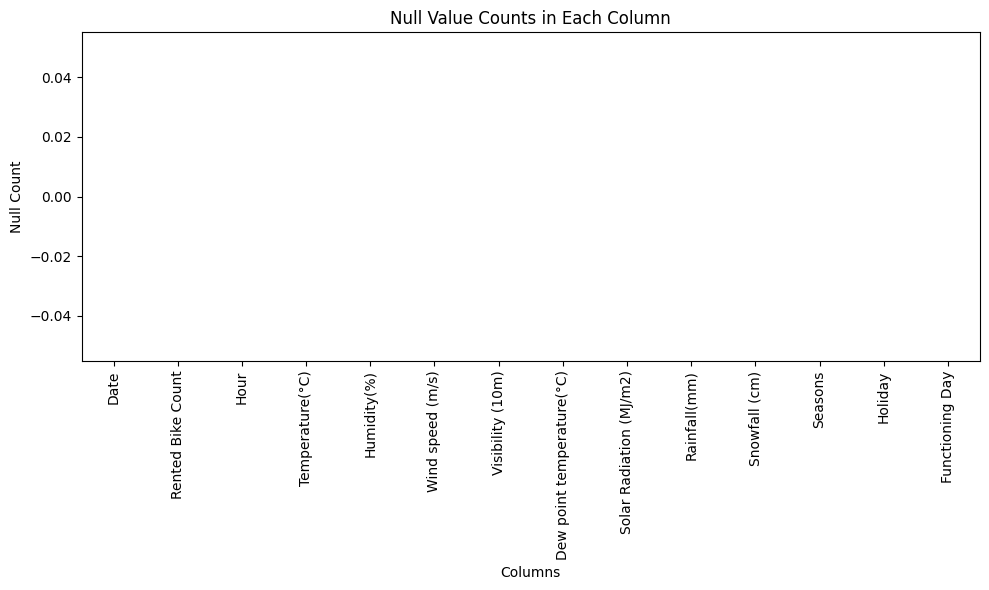

In [ ]:
# Visualizing the missing values
# Count non-null values in each column
null_counts = df.isnull().sum()

# Create a bar chart to visualize non-null counts
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue', alpha=0.4)
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.title('Null Value Counts in Each Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### What did you know about your dataset?

there are no null and duplicateds in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

**Dataset Description: Bike Sharing Demand**

This dataset contains information related to bike sharing demand and various environmental factors. It covers a period of time, including data on bike rentals, weather conditions, and other relevant attributes.

**Column Descriptions:**

Date: Date and time when the data was recorded.

Rented Bike Count: The number of bikes rented at a specific date and time. This is the target variable for prediction.

Hour: The hour of the day when the data was recorded.

Temperature(°C): The temperature in degrees Celsius.

Humidity(%): The humidity percentage.

Wind speed (m/s): Wind speed in meters per second.

Visibility (10m): Visibility in meters.

Dew point temperature(°C): Dew point temperature in degrees Celsius.

Solar Radiation (MJ/m2): Solar radiation in mega-joules per square meter.

Rainfall(mm): Rainfall in millimeters.

Snowfall (cm): Snowfall in centimeters.

Seasons: The season at the time of data recording (e.g., Spring, Summer).

Holiday: Indicates whether it was a holiday or not.

Functioning Day: Indicates whether it was a functioning day (working day) or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Date': ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['Date'] = df['Date'].astype(np.datetime64)


### What all manipulations have you done and insights you found?

Changed Date column datatype from object to Datetime data type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

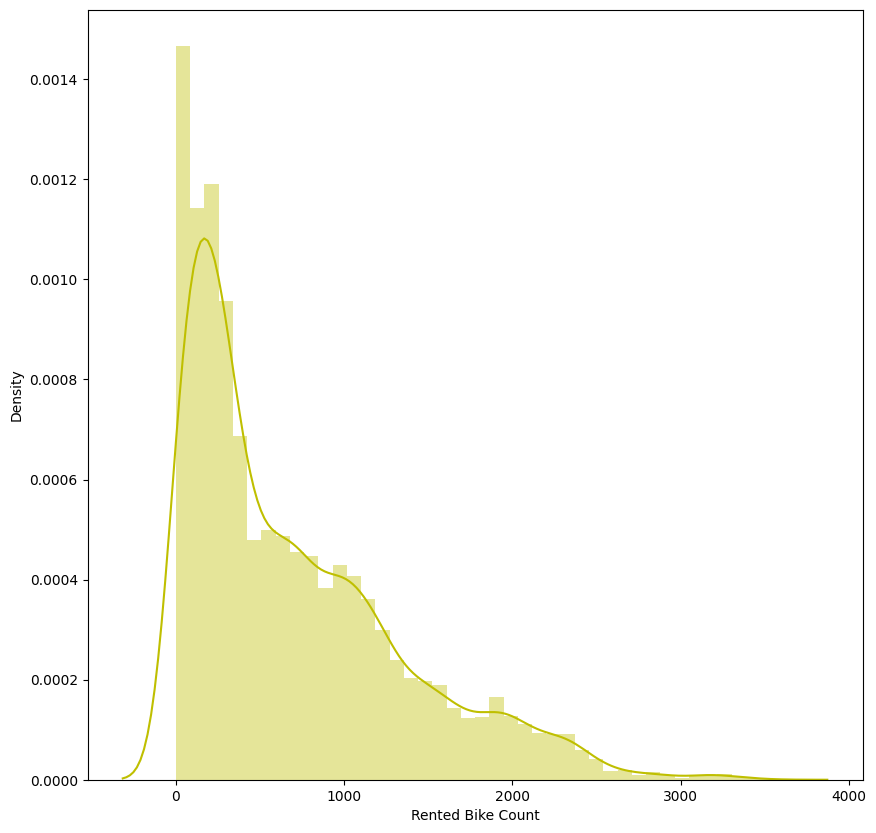

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,10))
sns.distplot(df['Rented Bike Count'],color="y")




##### 1. Why did you pick the specific chart?

The specific chart, which is a distribution plot of the original 'Rented Bike Count' variable, was chosen to assess whether the dependent variable follows a normal distribution.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that the original distribution of the 'Rented Bike Count' variable is slightly positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the dependent variable is slightly positively skewed is valuable for modeling and prediction purposes. Many statistical models, including regression models, assume that the target variable follows a normal distribution.

#### Chart - 2

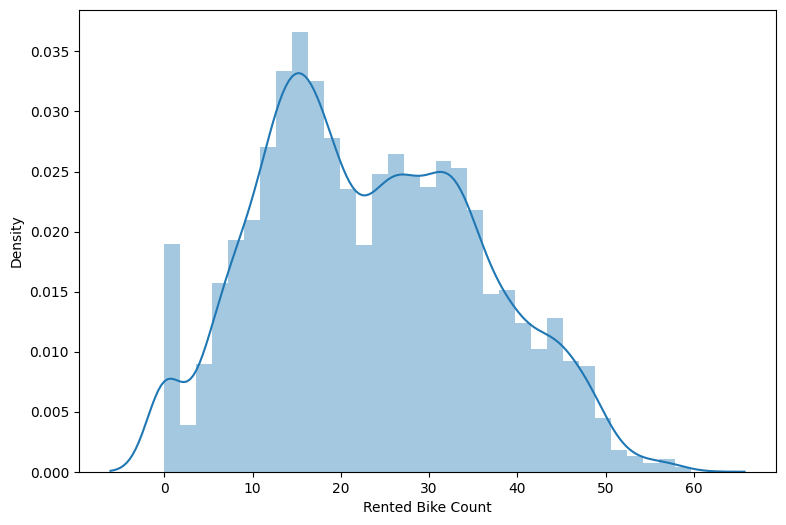

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(9,6))
sns.distplot(np.sqrt(df['Rented Bike Count']));

##### 1. Why did you pick the specific chart?

The specific chart chosen is a distribution plot of the 'Rented Bike Count' variable after applying the square root transformation.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the distribution of the 'Rented Bike Count' variable, after the square root transformation, appears to be less skewed compared to the original distribution.
The positively skewed nature of the original variable has been reduced to some extent, making the transformed data more symmetric.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the square root transformation has reduced skewness in the variable is positive for modeling purposes. This transformation can lead to improved model performance by aligning the data more closely with the assumptions of some statistical models.

#### Chart - 3

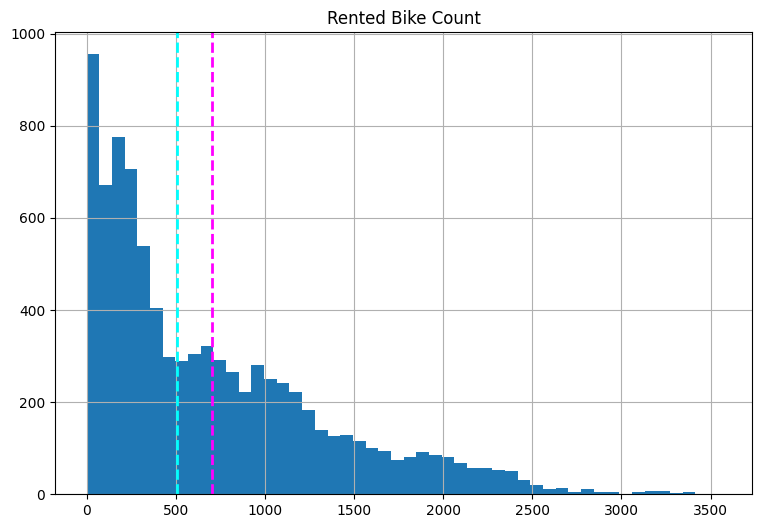

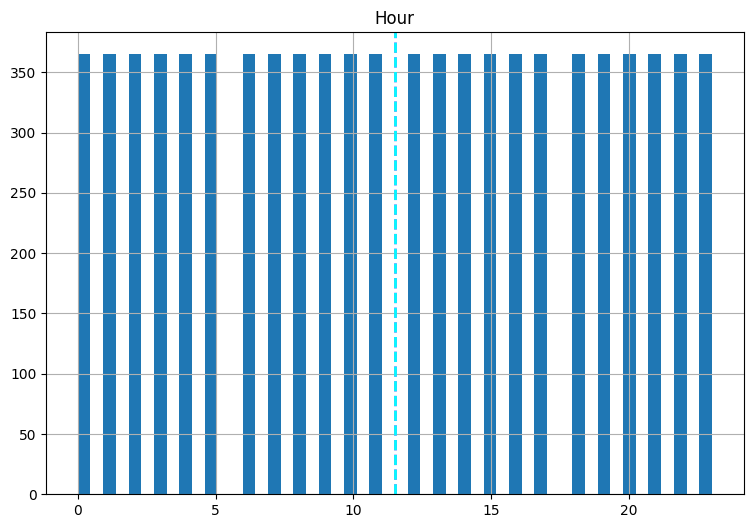

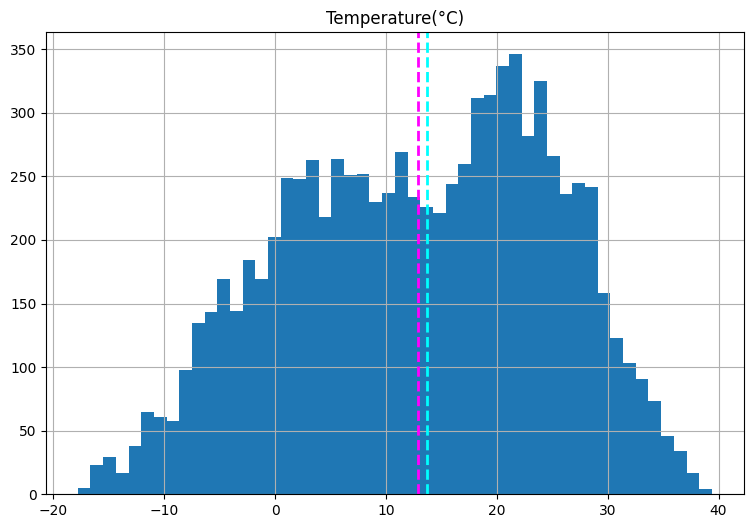

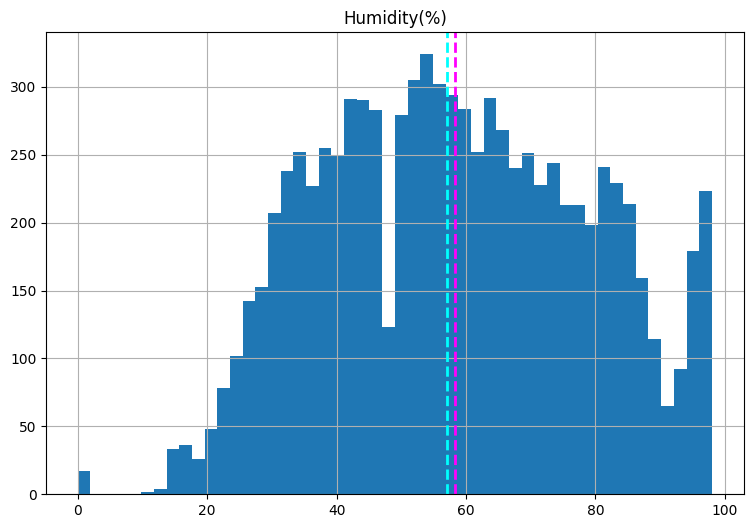

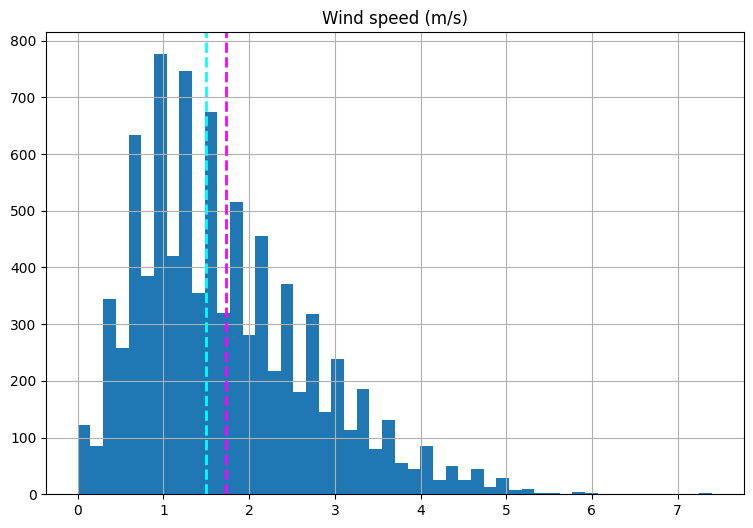

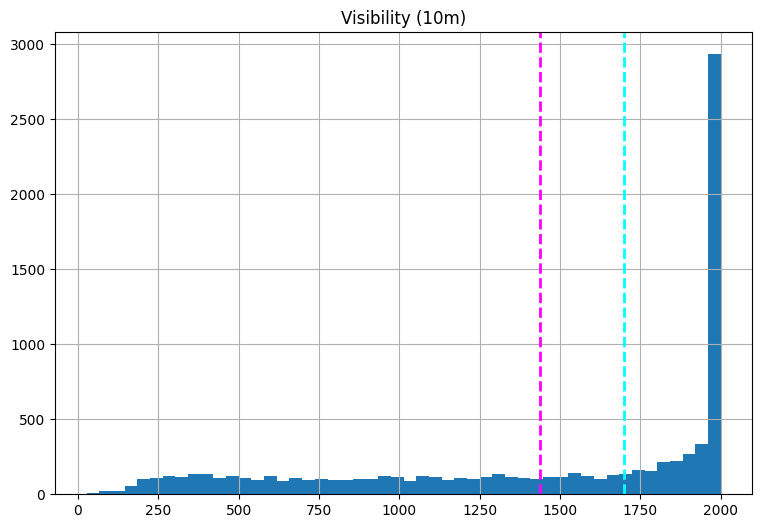

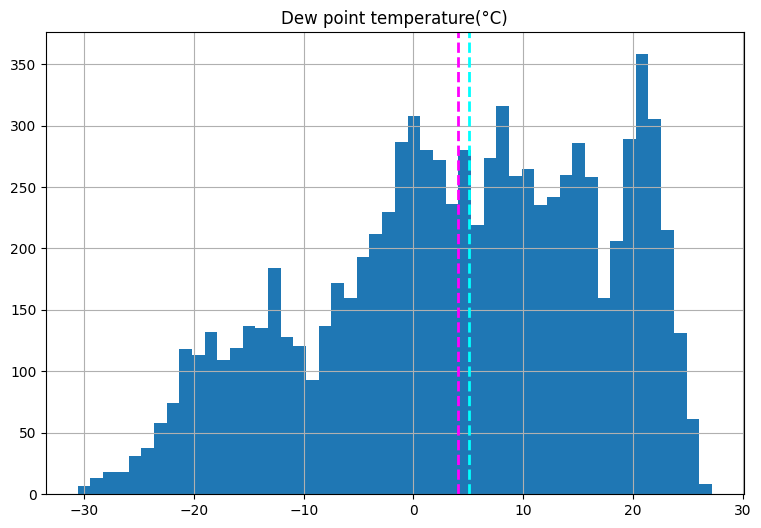

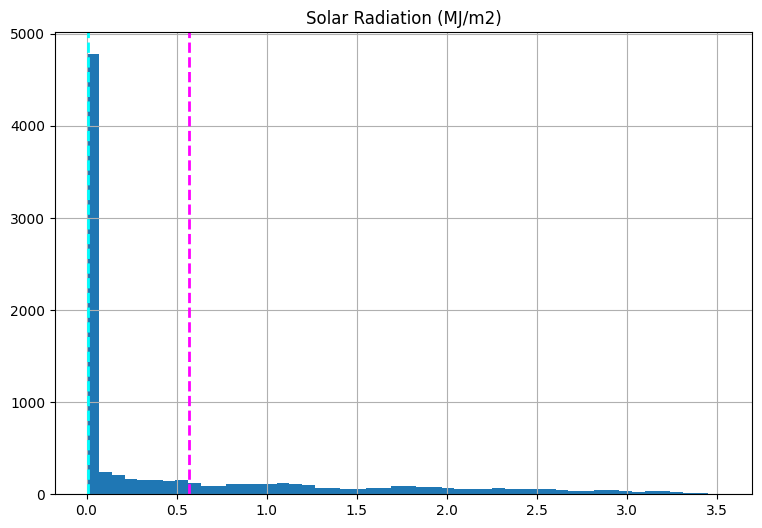

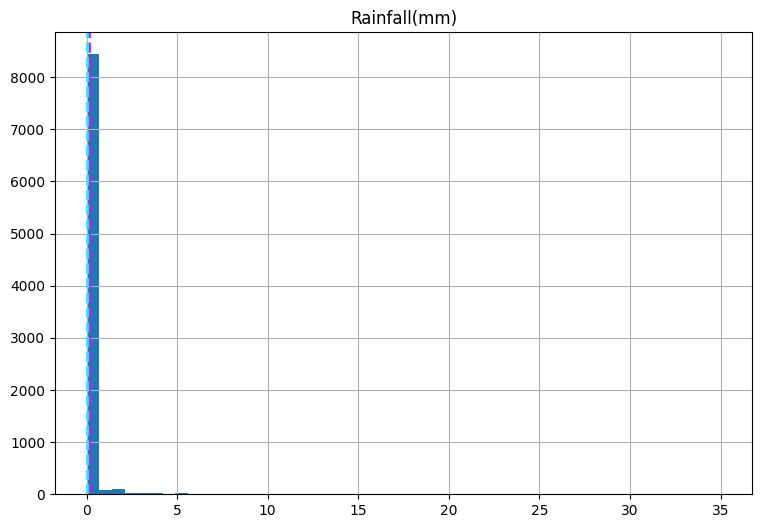

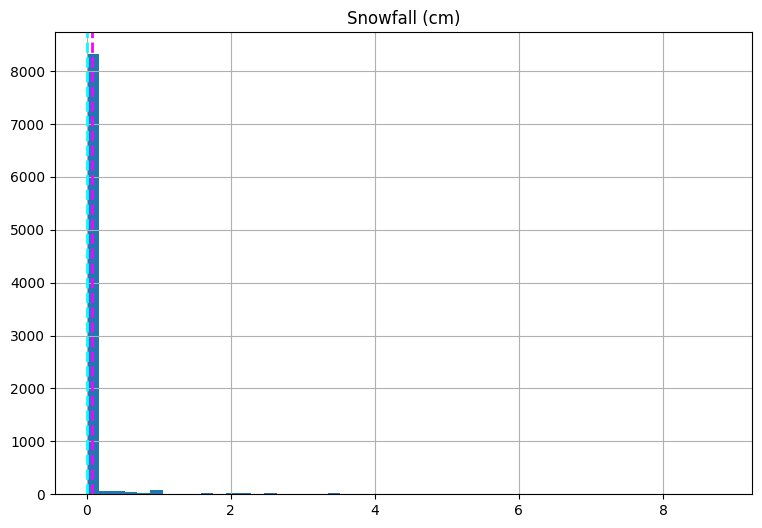

In [ ]:
# Chart - 3 visualization code
numeric_features = df.describe().columns
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a series of histograms with mean and median lines for each numeric feature in the dataset. This choice of chart is suitable for exploring the distributions of numeric variables.

##### 2. What is/are the insight(s) found from the chart?

By examining the histograms with mean and median lines, we can observe the central tendencies of each numeric feature.
We can visually assess the skewness of each distribution. If a distribution is skewed, it may have a longer tail on one side, indicating potential outliers or non-normality.
The histograms provide a sense of the spread and range of values for each feature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of numeric features allows for better decision-making in various domains. For example, in the context of bike rental demand analysis, knowing the distribution of temperature, humidity, or wind speed can help businesses tailor their services and marketing strategies to specific weather conditions, potentially leading to increased customer satisfaction and demand during favorable conditions.

#### Chart - 4

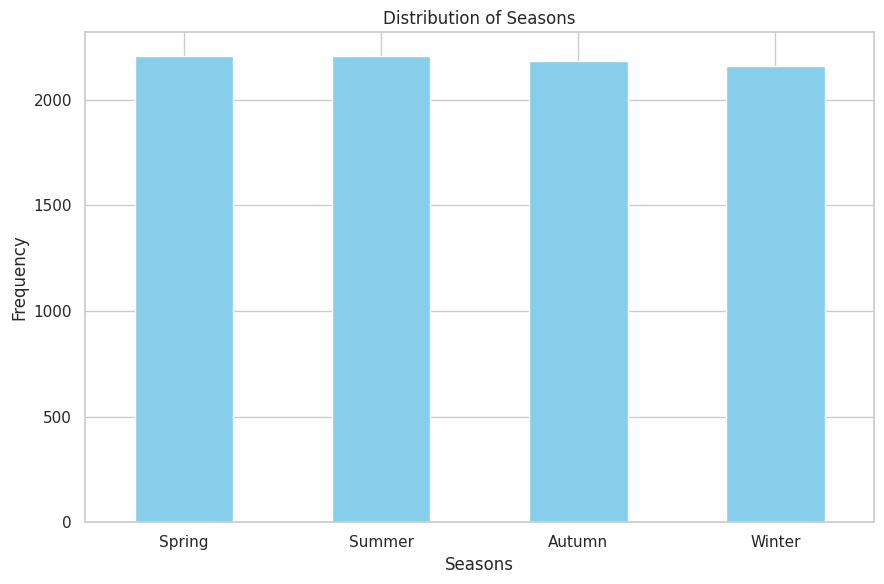

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt

# Create a bar chart for 'Seasons'
plt.figure(figsize=(9, 6))
ax = plt.gca()
category_counts = df['Seasons'].value_counts()
category_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Distribution of Seasons')
ax.set_xlabel('Seasons')
ax.set_ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the distribution of the 'Seasons' column because it is a categorical variable with distinct categories (e.g., spring, summer, fall, winter). A bar chart is suitable for displaying the frequency or count of each category in a categorical column.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that each season has nearly the same frequency, indicating a relatively balanced distribution of bike rental data across the seasons. This suggests that the dataset contains a similar number of observations for each season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals that each season has nearly the same frequency, indicating a relatively balanced distribution of bike rental data across the seasons. This suggests that the dataset contains a similar number of observations for each season.

#### Chart - 5

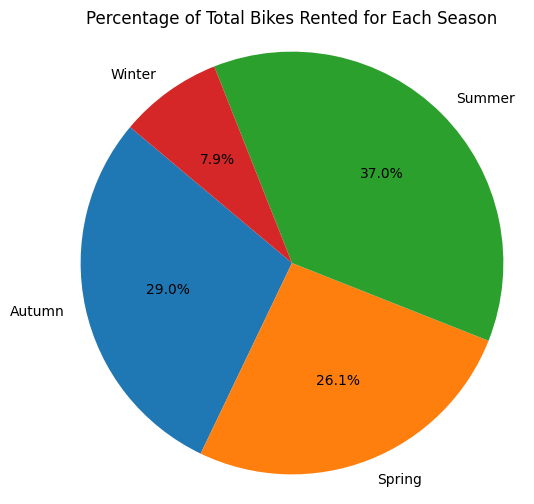

In [ ]:
# Chart - 5 visualization code
# Count the occurrences of each season
season_total_rentals = df.groupby('Seasons')['Rented Bike Count'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(season_total_rentals, labels=season_total_rentals.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Bikes Rented for Each Season')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visualize the distribution of bike rentals across different seasons because it effectively represents the proportion of total bike rentals for each season.

##### 2. What is/are the insight(s) found from the chart?

Summer has the highest percentage of total bike rentals, accounting for 37.0% of all rentals.
autumn and Spring have similar percentages of bike rentals, each contributing around 29% and 26.1% to the total, respectively.
Winter has the lowest percentage of total bike rentals, with only 7.9%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that Summer has the highest percentage of bike rentals could be valuable for a bike-sharing business. It suggests that during the summer season, there is a high demand for bike rentals, which could lead to increased revenue and positive business impact.

Conversely, the insight that Winter has the lowest percentage of bike rentals indicates a potential decrease in demand during the winter season. This could lead to negative growth during the winter months.

#### Chart - 6

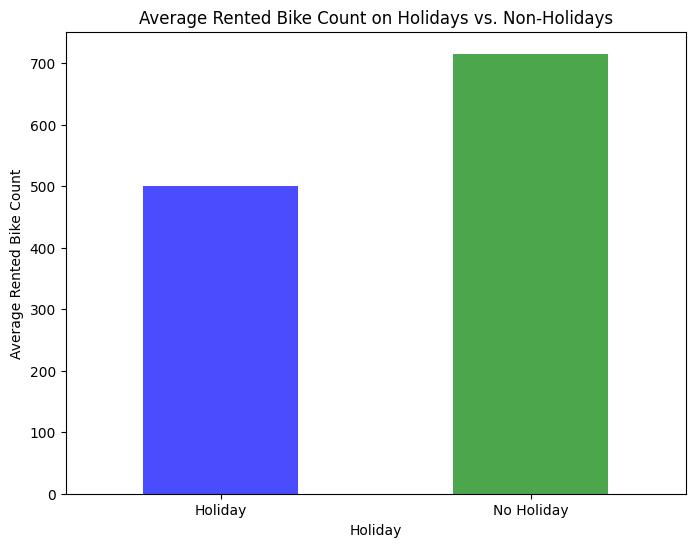

In [ ]:
# Chart - 6 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by the 'Holiday' column and calculate the average rented bike count
rentals_by_holiday = df.groupby('Holiday')['Rented Bike Count'].mean()

# Create a bar chart to compare rented bike count on holidays and non-holidays
plt.figure(figsize=(8, 6))
rentals_by_holiday.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count on Holidays vs. Non-Holidays')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?


A bar chart was chosen to compare the average rented bike count on holidays versus non-holidays because it effectively presents a clear visual comparison between the two categories.



##### 2. What is/are the insight(s) found from the chart?

The chart shows that the average rented bike count on non-holidays is around 700, while on holidays, it is around 500.
This suggests that, on average, there is a higher demand for bike rentals on non-holidays compared to holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that bike rentals are higher on non-holidays indicates a positive trend for the business. It suggests that during regular working days (non-holidays), there is increased demand for bike rentals, potentially leading to higher revenue and positive business impact.

However, the lower demand for bike rentals on holidays may be viewed as a potential area for improvement. The business might consider holiday-specific promotions or events to attract more customers during holiday periods, potentially mitigating the negative growth associated with lower demand on holidays.

#### Chart - 7

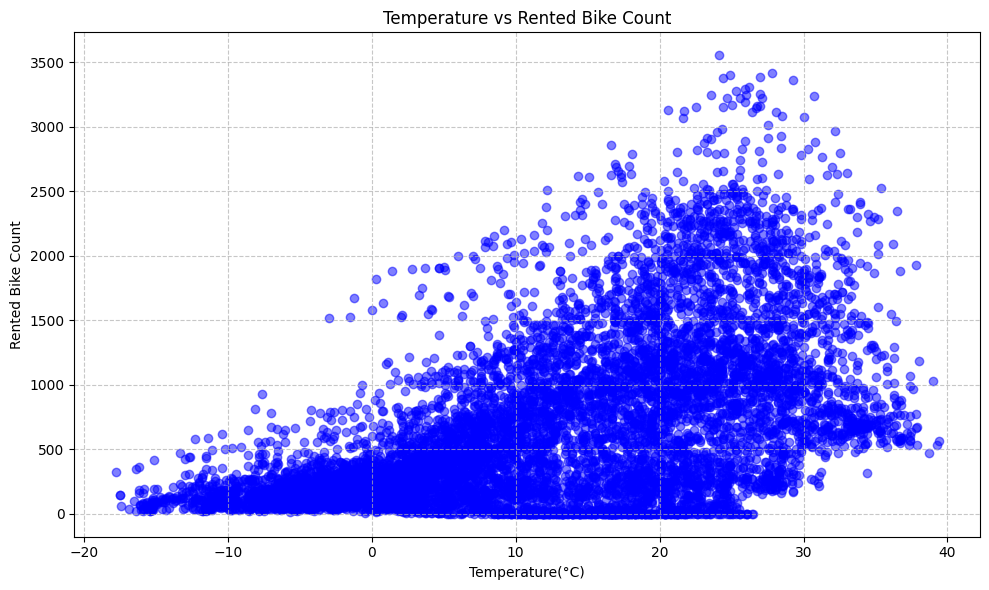

In [ ]:
# Chart - 7 visualization code

# Create a scatter plot of 'Temperature(°C)' vs 'Rented Bike Count'
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.5, color='blue')
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The specific chart chosen is a scatter plot of 'Temperature(°C)' vs 'Rented Bike Count.' This chart was selected to visually assess the relationship between temperature and bike rental counts

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the rented bike count tends to be higher within the temperature range of approximately 20 to 30 degrees Celsius.
This suggests that there is a positive relationship between temperature and bike rentals within this temperature range. Customers are more likely to rent bikes when the temperature falls within this comfortable and moderate range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that temperature between 20 to 30 degrees Celsius is associated with higher bike rental counts can be valuable for business planning. Bike rental businesses can optimize their operations, marketing, and inventory during these temperature ranges to meet customer demand efficiently.

#### Chart - 8

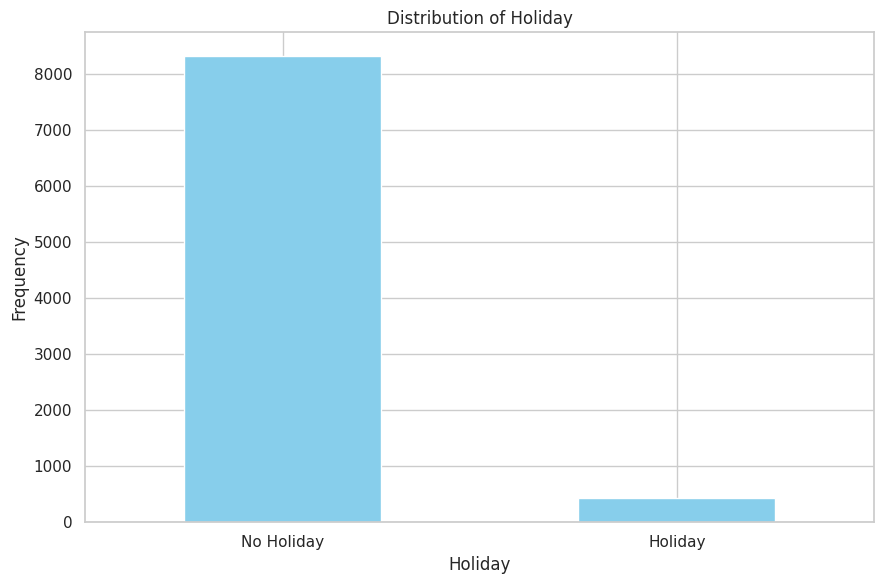

In [ ]:
# Chart - 8 visualization code
# Create a bar chart for 'Holiday'
plt.figure(figsize=(9, 6))
ax = plt.gca()
category_counts = df['Holiday'].value_counts()
category_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Distribution of Holiday')
ax.set_xlabel('Holiday')
ax.set_ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






##### 1. Why did you pick the specific chart?

I selected a bar chart to visualize the distribution of the 'Holiday' column because it's a categorical variable with two distinct categories: 'No Holiday' and 'Holiday.' A bar chart is an appropriate choice to display the frequency or count of each category in such a categorical column.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that there are significantly more instances of 'No Holiday' (around 8000) compared to 'Holiday' (around 400). This indicates an imbalance in the dataset with a much higher frequency of non-holiday days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the frequency of holidays versus non-holidays can help businesses optimize their operations. For instance, on holidays with lower demand, a business may choose to reduce staff or inventory levels to save costs. On the other hand, for non-holidays with high demand, they may want to ensure sufficient resources are available to meet customer needs

#### Chart - 9

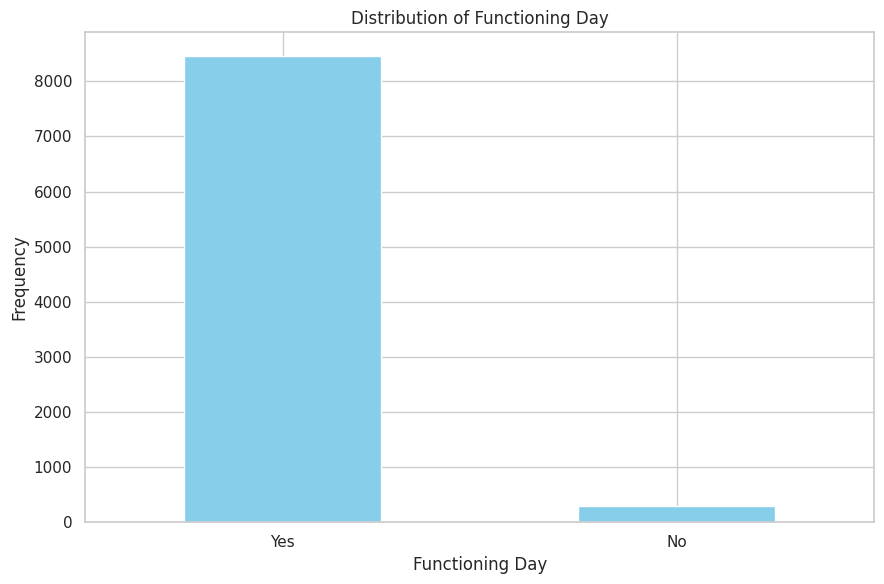

In [ ]:
# Chart - 9 visualization code
# Create a bar chart for 'Functioning Day'
plt.figure(figsize=(9, 6))
ax = plt.gca()
category_counts = df['Functioning Day'].value_counts()
category_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Distribution of Functioning Day')
ax.set_xlabel('Functioning Day')
ax.set_ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the distribution of the 'Functioning Day' column because it's a categorical variable with two distinct categories: 'Functioning' and 'Non-Functioning.' A bar chart effectively displays the frequency or count of each category in a categorical column.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that there is a significant difference in frequency between 'Functioning Day' (around 8000) and 'Non-Functioning Day' (around 400). This indicates an imbalance in the dataset, with a much higher frequency of functioning days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding this frequency difference can help businesses optimize their operations based on whether it's a functioning or non-functioning day. For example, on non-functioning days with lower demand, they may reduce staffing levels or adjust inventory to save costs. On functioning days with higher demand, they can ensure sufficient resources are available to meet customer needs.

#### Chart - 10

<Figure size 1000x600 with 0 Axes>

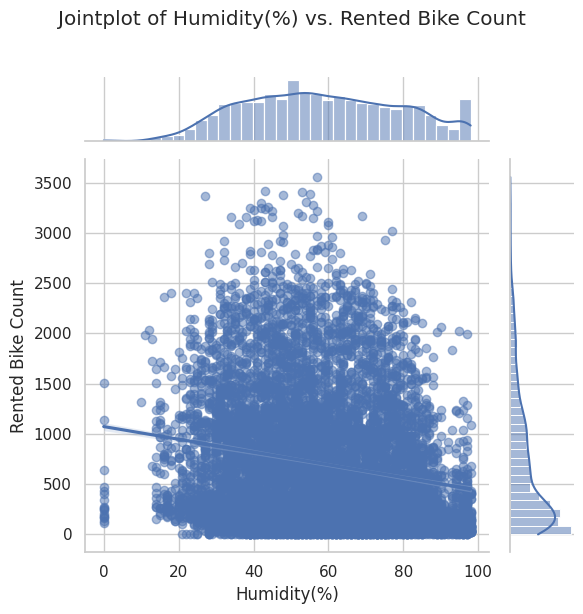

In [ ]:
# Chart - 10 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot of 'Humidity(%)' vs. 'Rented Bike Count'
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='Humidity(%)', y='Rented Bike Count', kind='reg', scatter_kws={'alpha':0.5})
plt.suptitle('Jointplot of Humidity(%) vs. Rented Bike Count', y=1.02)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I chose a jointplot with regression lines to visualize the relationship between humidity and 'Rented Bike Count.' This type of chart provides a clear and informative representation of the data, including scatter points, regression lines, and a correlation coefficient, making it suitable for exploring correlations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that bike rentals peak within a specific humidity range of approximately 40% to 60%, implying a potential non-linear relationship and an optimal range for rental activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can indeed help create a positive business impact. Knowing that bike rentals tend to be highest within a specific humidity range can inform business decisions related to resource allocation, marketing strategies, and inventory management.

#### Chart - 11

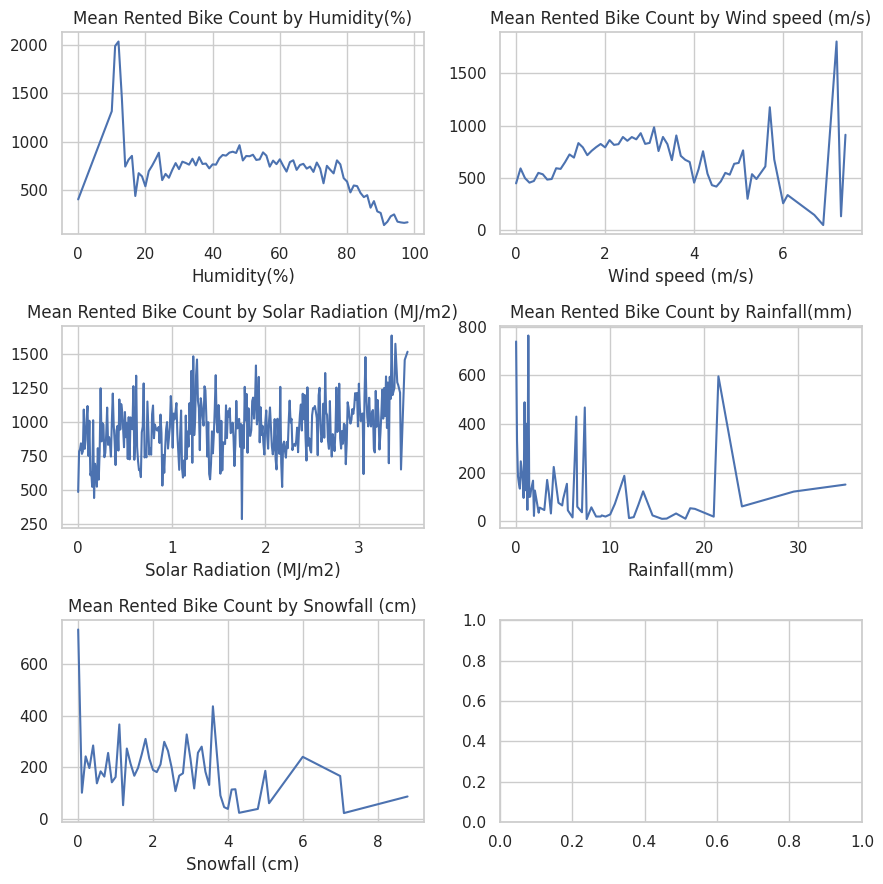

In [ ]:
# Chart - 11 visualization code
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(9, 9))

# Plot mean 'Rented Bike Count' for each feature
df.groupby('Humidity(%)').mean()['Rented Bike Count'].plot(ax=ax[0][0])
df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot(ax=ax[0][1])
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot(ax=ax[1][0])
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(ax=ax[1][1])
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot(ax=ax[2][0])

# Set titles for subplots
ax[0][0].set_title('Mean Rented Bike Count by Humidity(%)')
ax[0][1].set_title('Mean Rented Bike Count by Wind speed (m/s)')
ax[1][0].set_title('Mean Rented Bike Count by Solar Radiation (MJ/m2)')
ax[1][1].set_title('Mean Rented Bike Count by Rainfall(mm)')
ax[2][0].set_title('Mean Rented Bike Count by Snowfall (cm)')

# Display the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a set of line charts to visualize the relationship between various environmental factors (humidity, wind speed, solar radiation, rainfall, snowfall) and the mean 'Rented Bike Count'.

##### 2. What is/are the insight(s) found from the chart?

Humidity: As humidity increases, there is a decreasing trend in the demand for rental bikes. Higher humidity levels are associated with lower bike rental counts, suggesting that people may be less inclined to rent bikes during very humid conditions.

---


Wind Speed and Solar Radiation: Both wind speed and solar radiation do not appear to have a significant impact on bike rental counts. The rental counts remain relatively consistent across different levels of these factors.

---


Rainfall: There is a noticeable decrease in bike rental counts when rainfall exceeds 10mm. However, there is a sharp increase in rental counts when rainfall exceeds 20mm. This sudden increase could be due to outlier data points or unusual weather conditions. Further investigation is needed to determine the cause of this peak.

---


Snowfall: An increase in snowfall is associated with a decrease in rented bike counts. This makes sense, as snowy conditions may deter people from using bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the negative impact of high humidity on bike rentals can inform business strategies. For instance, bike rental companies can offer promotions or incentives during humid conditions to attract more customers.

#### Chart - 12

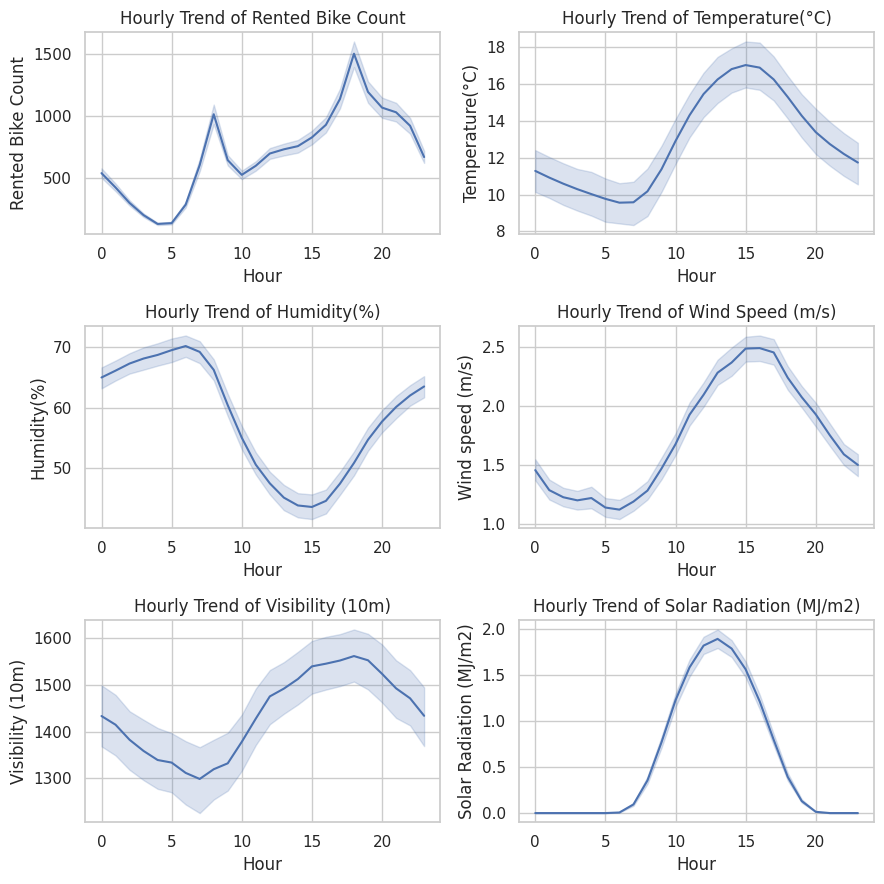

In [ ]:
# Chart - 12 visualization code
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(9, 9))

# Line plot of numerical variables during hours
sns.lineplot(x='Hour', y='Rented Bike Count', data=df, ax=ax[0][0])
sns.lineplot(x='Hour', y='Temperature(°C)', data=df, ax=ax[0][1])
sns.lineplot(x='Hour', y='Humidity(%)', data=df, ax=ax[1][0])
sns.lineplot(x='Hour', y='Wind speed (m/s)', data=df, ax=ax[1][1])
sns.lineplot(x='Hour', y='Visibility (10m)', data=df, ax=ax[2][0])
sns.lineplot(x='Hour', y='Solar Radiation (MJ/m2)', data=df, ax=ax[2][1])

# Set titles for subplots
ax[0][0].set_title('Hourly Trend of Rented Bike Count')
ax[0][1].set_title('Hourly Trend of Temperature(°C)')
ax[1][0].set_title('Hourly Trend of Humidity(%)')
ax[1][1].set_title('Hourly Trend of Wind Speed (m/s)')
ax[2][0].set_title('Hourly Trend of Visibility (10m)')
ax[2][1].set_title('Hourly Trend of Solar Radiation (MJ/m2)')

# Display the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose line charts to visualize the hourly trends of numerical variables because they are effective in showing how these variables change over time, in this case, during different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

Rented Bike Count: The demand for rental bikes follows a clear pattern throughout the day. It increases in the morning, reaches its peak around 8 am, and then again in the evening around 6 pm, suggesting higher demand during office opening and closing times.

---


Temperature: Temperature shows a similar pattern, with temperatures rising throughout the day and reaching their highest point in the afternoon.

---


Humidity(%): Humidity levels remain relatively consistent throughout the day, with no significant hourly variation.



---


Wind Speed (m/s): Wind speed also remains fairly constant, with minor fluctuations during the day.
Visibility (10m): Visibility levels remain stable with no significant hourly variations.

---


Solar Radiation (MJ/m2): Solar radiation follows a pattern similar to temperature, increasing as the day progresses and peaking in the afternoon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the hourly trends in demand for rental bikes allows businesses to optimize their bike allocation and staffing during peak hours (e.g., 8 am and 6 pm). This can lead to improved customer service and revenue.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

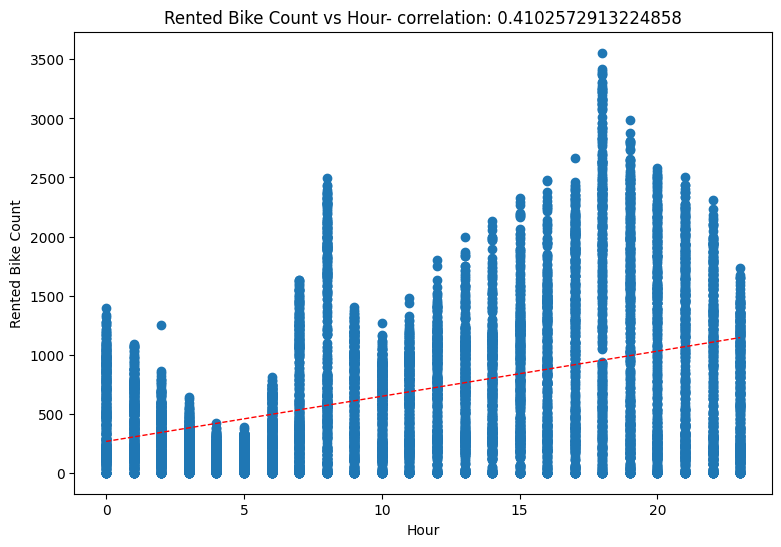

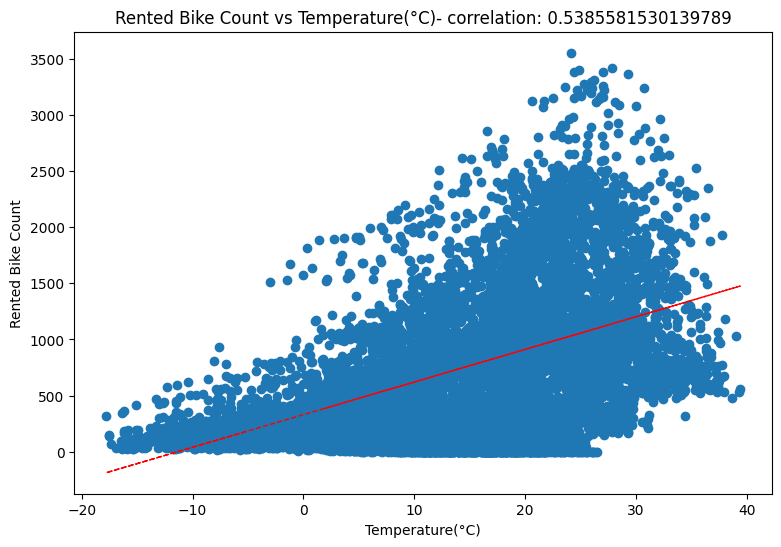

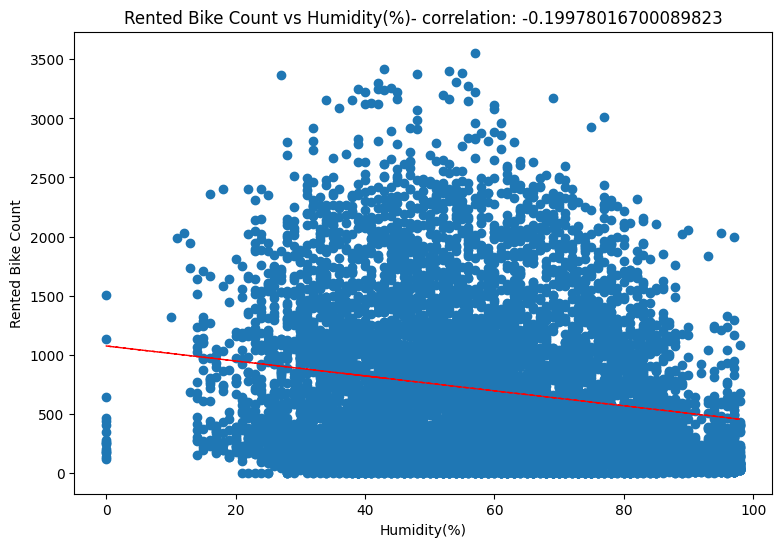

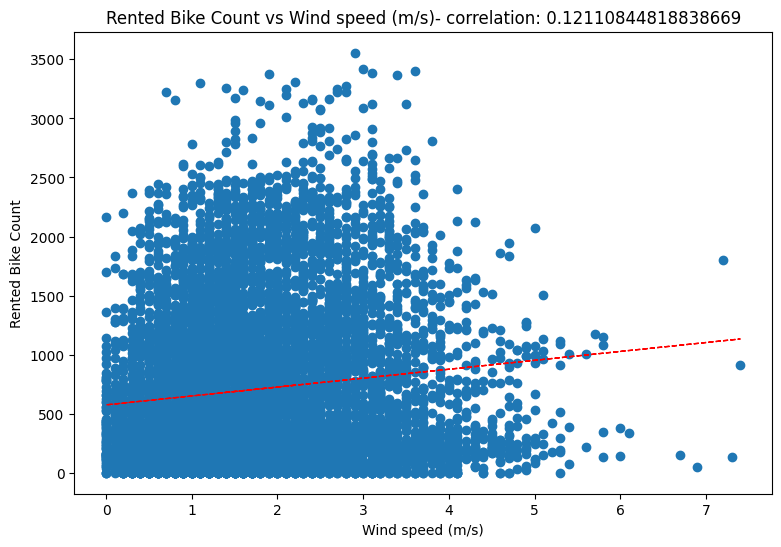

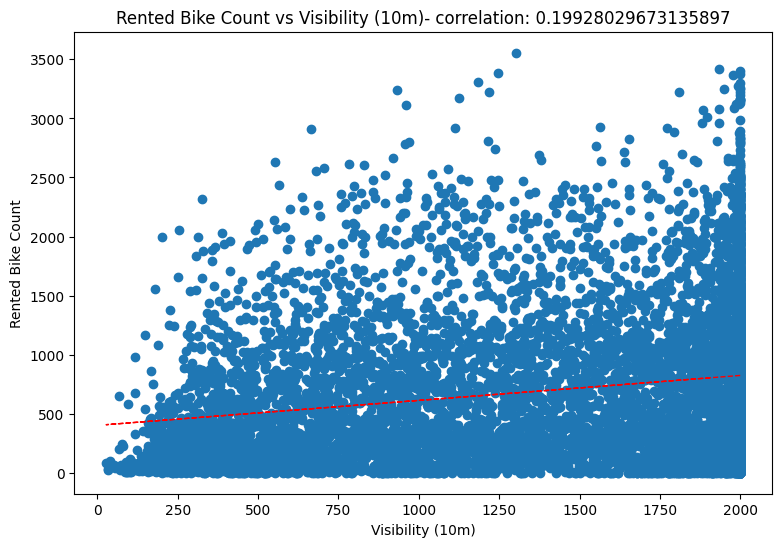

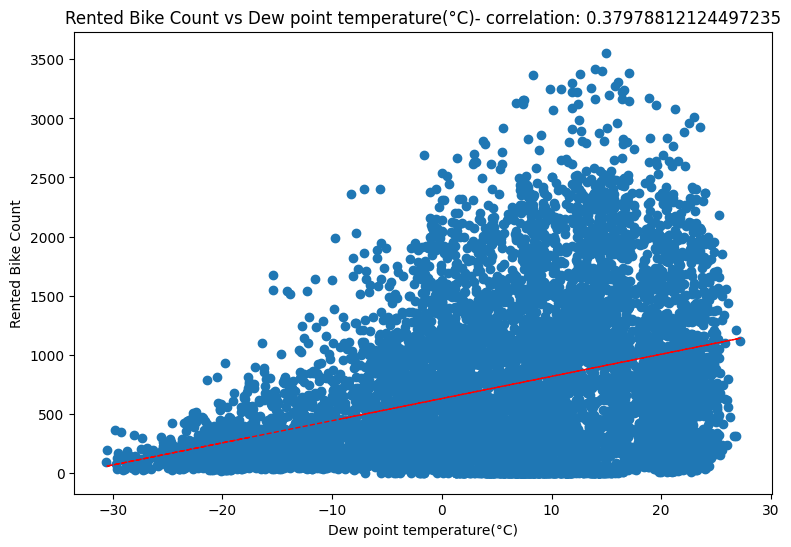

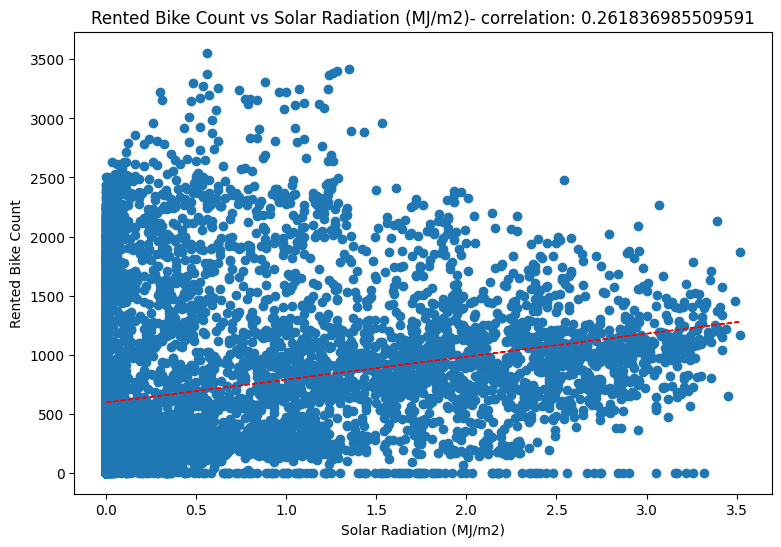

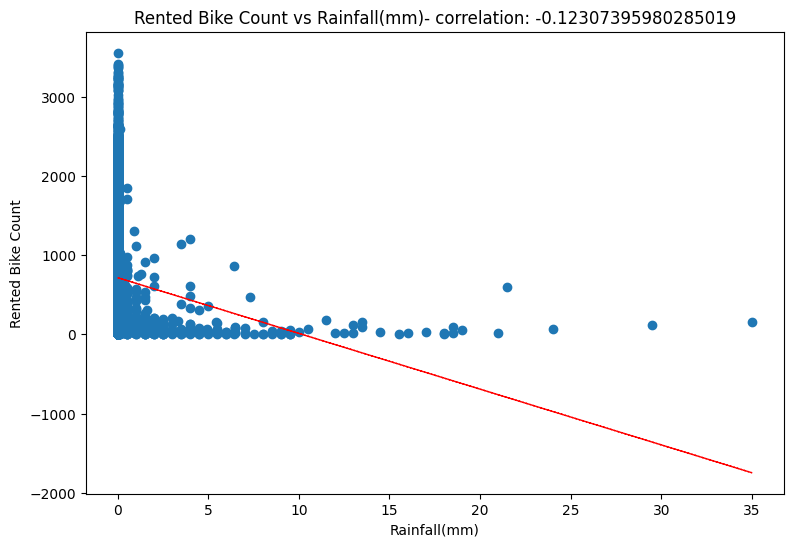

In [ ]:
numeric_features = df.describe().columns
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

I chose scatter plots with regression lines to visualize the relationships between numerical features and the target variable 'Rented Bike Count.'

##### 2. What is/are the insight(s) found from the chart?

There are varying degrees of linear relationships between the numerical features and the target variable 'Rented Bike Count.'
Some features exhibit a positive linear relationship with bike rentals(e.g tempetarure,due point temperature ect), meaning an increase in these feature values is associated with an increase in bike rentals.
Conversely, some features show a negative linear relationship(e.g humidity), indicating that an increase in these feature values is linked to a decrease in bike rentals.
Some features have relatively weak or flat (e.g hour) linear relationships with bike rentals, suggesting that they may not strongly influence rental counts in a linear manner.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis of linearity will help in determining the suitability of linear regression modeling. Linear regression assumes a linear relationship between the independent variables and the dependent variable. Therefore, understanding the degree of linearity in these relationships is crucial for modeling.

#### Chart - 14 - Correlation Heatmap

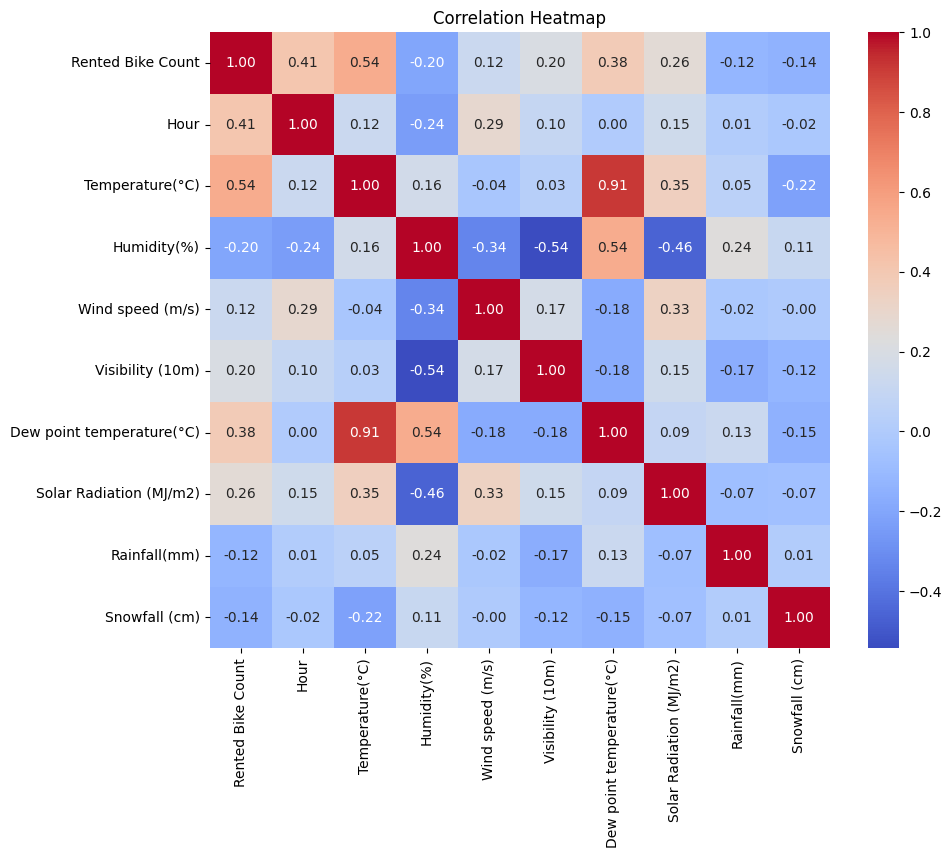

In [ ]:
# Correlation Heatmap visualization code
# Create a heatmap
# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen to visualize the correlation matrix between numerical variables. It's a valuable tool to identify multicollinearity, which is the presence of high correlations between independent variables (features) in a regression analysis.

##### 2. What is/are the insight(s) found from the chart?


some independent variables in the dataset are highly correlated with each other indecating multicolinearity.
The most correlated features to the rented bike count are hour,temperature(°c),dew point temperature(°c),and solar radiation (mj/m2).

#### Chart - 15 - Pair Plot

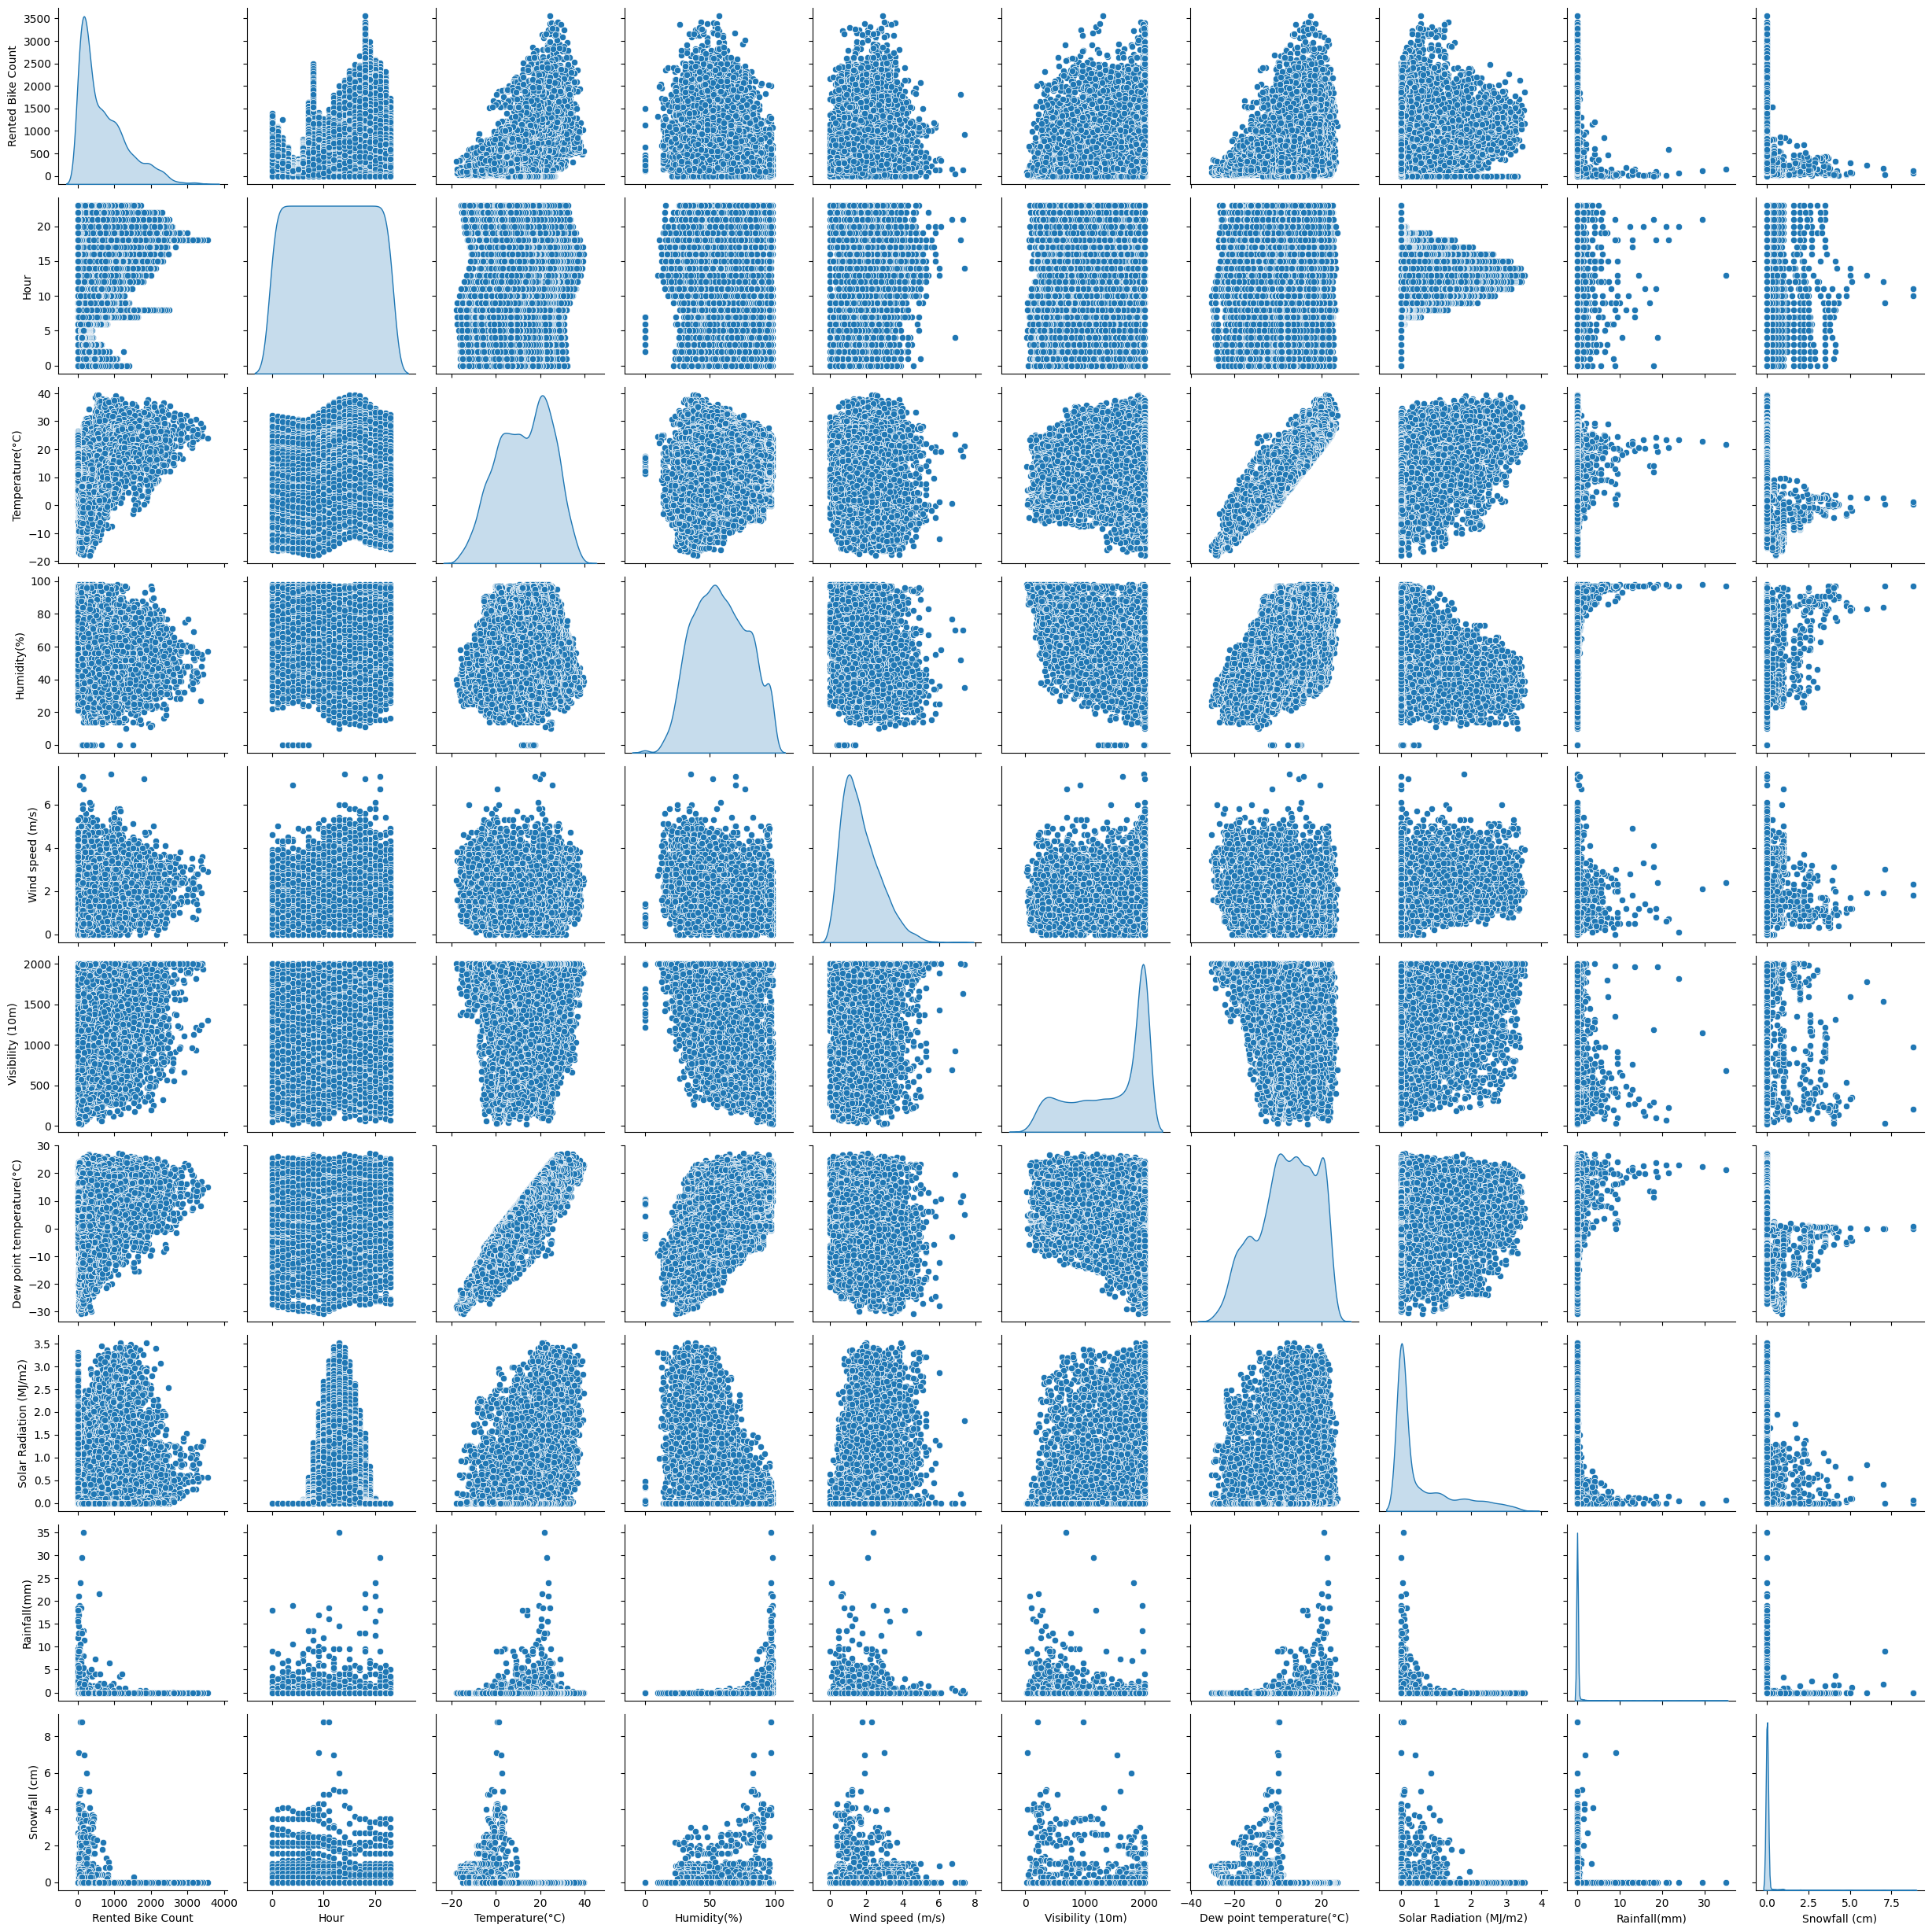

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')  # Use 'kde' for diagonal plots
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots provide a comprehensive view of pairwise relationships between numerical variables in the dataset. They allow us to quickly assess how variables are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Pair plots help identify potential relationships, patterns, and correlations between variables. For example, they can reveal linear or nonlinear associations between variables, as well as the distribution of individual variables along the diagonal. These insights can be valuable for understanding the data and making decisions about feature selection or modeling approaches.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Null Hypothesis (H0)**: The demand for rented bikes on holidays is equal to the demand on non-holidays.

**Alternative Hypothesis (H1):** The demand for rented bikes on holidays is not equal to the demand on non-holidays.

Conclusion: We reject the null hypothesis, suggesting that there is a significant difference in the demand for rented bikes between holidays and non-holidays. In other words, the demand for rented bikes is not equal on holidays and non-holidays.

**Null Hypothesis (H0)**: There is no significant relationship between temperature (°C) and the number of rented bikes.

**Alternative Hypothesis (H1)**: There is significant relationship between temperature (°C) and the number of rented bikes.

Conclusion: We reject the null hypothesis, indicating that there is a significant relationship between temperature (°C) and the number of rented bikes. Temperature does impact bike rental demand, and there is evidence to support this relationship.

**Null Hypothesis (H0)**: There is no significant relationship between humidity (%) and the number of rented bikes.

**Alternative Hypothesis (H1)**: There is significant relationship between humidity (%) and the number of rented bikes.


Conclusion: We reject the null hypothesis, implying that there is a significant relationship between humidity (%) and the number of rented bikes. Humidity levels do affect bike rental counts, and there is statistical evidence to support this relationship.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: The demand for rented bikes on holidays is equal to the demand on non-holidays.

>


**Alternative Hypothesis (H1)**: The demand for rented bikes on holidays
is not equal to the demand on non-holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Define hypotheses and variables
X1 = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
y = df['Rented Bike Count']

# Fit the linear regression model
X1 = sm.add_constant(X1)  # Add a constant term (intercept)
model1 = sm.OLS(y, X1).fit()

# Get the summary statistics
summary1 = model1.summary()
print(summary1)
# Extract the p-value and t-statistic for the 'Holiday' variable
p_value1 = model1.pvalues['Holiday']
t_statistic1 = model1.tvalues['Holiday']

print("Hypothesis 1 - Test Results:")
print("T-statistic:", t_statistic1)
print("P-value:", p_value1)
print("Conclusion:", "Reject the null hypothesis (H0)" if p_value1 < 0.05 else "Fail to reject the null hypothesis (H0)")




                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     46.07
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.22e-11
Time:                        07:06:14   Log-Likelihood:                -69077.
No. Observations:                8760   AIC:                         1.382e+05
Df Residuals:                    8758   BIC:                         1.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        715.2280      7.050    101.455      0.0

##### Which statistical test have you done to obtain P-Value?

In above Hypothesis , we wanted to compare the means of two independent groups: the demand for rented bikes on holidays (group 1) and the demand on non-holidays (group 2).

>


The two-sample t-test is appropriate for comparing the means of two groups.By performing this t-test, we can assess whether there is a statistically significant difference in the demand for rented bikes between holidays and non-holidays.

##### Why did you choose the specific statistical test?

The results indicate that the p-value is extremely small (close to zero), which suggests strong evidence against the null hypothesis (H0). Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in the demand for rented bikes between holidays and non-holidays.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant relationship between temperature (°C) and the number of rented bikes.

>


**Alternative Hypothesis (H1)**: There is a significant relationship between temperature (°C) and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Define null and alternative hypotheses
null_hypothesis_2 = 'There is no relationship between temperature and Rented Bike Count.'
alt_hypothesis_2 = 'There is a relationship between temperature and Rented Bike Count.'

# Perform linear regression
X2 = sm.add_constant(df['Temperature(°C)'])
y = df['Rented Bike Count']
model2 = sm.OLS(y, X2).fit()

# Extract p-value for temperature coefficient
p_value2 = model2.pvalues[1]

print("Hypothesis 2 - Test Results:")
print("T-statistic:", model2.tvalues[1])
print("P-value:", p_value2)
print("Conclusion:", "Reject the null hypothesis (H0)" if p_value2 < 0.05 else "Fail to reject the null hypothesis (H0)")


Hypothesis 2 - Test Results:
T-statistic: 59.81631143617399
P-value: 0.0
Conclusion: Reject the null hypothesis (H0)


##### Which statistical test have you done to obtain P-Value?

 the statistical test used to obtain the p-value is linear regression. Linear regression is a suitable statistical test for examining the relationship between an independent variable (in this case, temperature) and a dependent variable (the number of rented bikes). It allows us to assess whether changes in temperature are associated with changes in the number of rented bikes.

##### Why did you choose the specific statistical test?

The choice of linear regression is appropriate because it allows us to model and quantify the linear relationship between temperature and bike rentals. By analyzing the coefficients and p-values associated with temperature, we can determine whether temperature has a statistically significant impact on bike rentals.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no significant relationship between humidity (%) and the number of rented bikes.

**Alternative Hypothesis (H1)**: There is a significant relationship between humidity (%) and the number of rented bikes.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Define null and alternative hypotheses
null_hypothesis_3 = 'There is no relationship between humidity and Rented Bike Count.'
alt_hypothesis_3 = 'There is a relationship between humidity and Rented Bike Count.'

# Perform linear regression
X3 = sm.add_constant(df['Humidity(%)'])
y = df['Rented Bike Count']
model3 = sm.OLS(y, X3).fit()

# Extract p-value for humidity coefficient
p_value3 = model3.pvalues[1]

print("Hypothesis 3 - Test Results:")
print("T-statistic:", model3.tvalues[1])
print("P-value:", p_value3)
print("Conclusion:", "Reject the null hypothesis (H0)" if p_value3 < 0.05 else "Fail to reject the null hypothesis (H0)")


Hypothesis 3 - Test Results:
T-statistic: -19.0809216185001
P-value: 1.4750651031311182e-79
Conclusion: Reject the null hypothesis (H0)


##### Which statistical test have you done to obtain P-Value?

Linear regression is employed to assess the relationship between an independent variable (in this case, wind speed) and a dependent variable (the number of rented bikes). It enables us to investigate whether changes in wind speed are linked to changes in the number of rented bikes.

##### Why did you choose the specific statistical test?

The selection of linear regression is appropriate because it permits us to model and quantify the linear relationship between wind speed and bike rentals. By examining the coefficients and p-values related to wind speed, we can determine whether wind speed has a statistically significant impact on bike rentals.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Checking if there is any null value in the dataset.

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing/null values in the dataset.

### 2. Handling Outliers

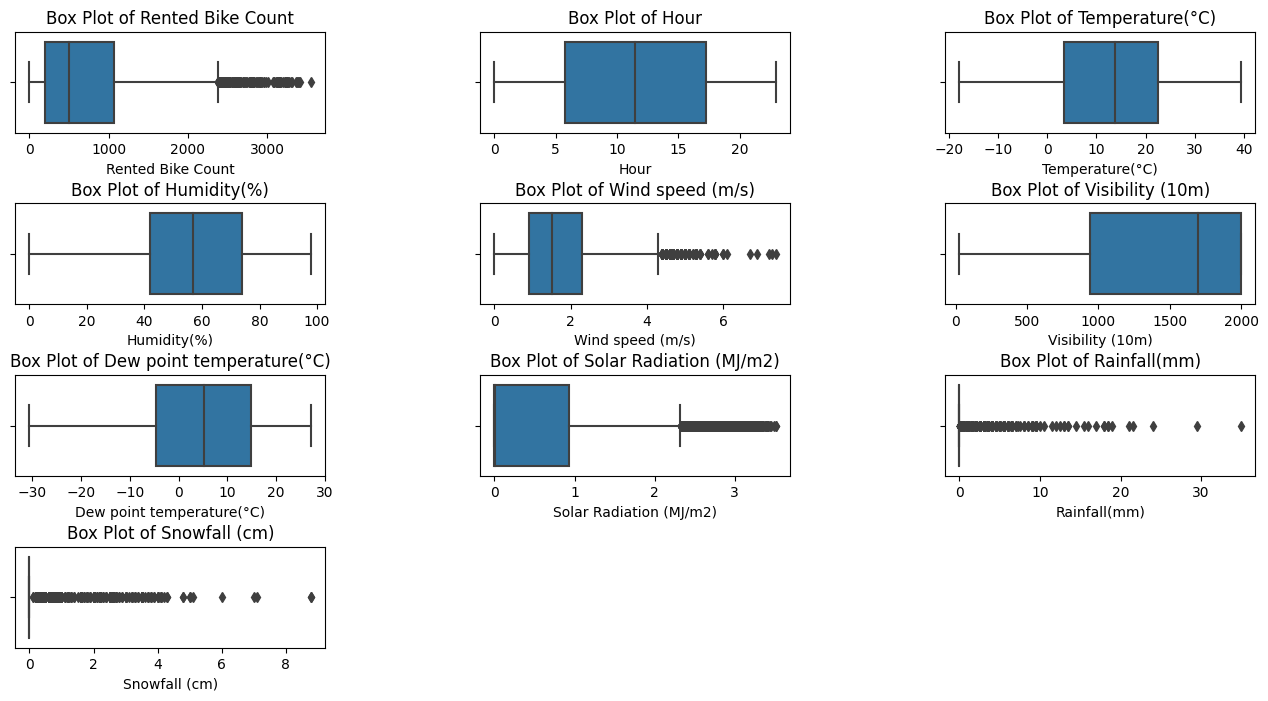

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows and columns for the subplot grid
num_cols = numerical_columns.shape[1]
num_rows = (num_cols // 3) + (num_cols % 3)

# Set up subplots for box plots
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=col, data=df, orient='vertical')
    plt.title(f'Box Plot of {col}')

# Show the plots
plt.show()

In [ ]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
import numpy as np

# Handle outliers and apply transformations

# 1. Rented Bike Count: Square root transformation
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

# 2. Wind speed (m/s): Log transformation
df['Wind speed (m/s)'] = np.log1p(df['Wind speed (m/s)'])

# 3. Solar Radiation (MJ/m2): Winsorization (replace extreme values with 90th percentile)
solar_max = df['Solar Radiation (MJ/m2)'].quantile(0.90)
df['Solar Radiation (MJ/m2)'] = np.where(df['Solar Radiation (MJ/m2)'] > solar_max, solar_max, df['Solar Radiation (MJ/m2)'])



##### What all outlier treatment techniques have you used and why did you use those techniques?

Transformation:

Square Root Transformation for 'Rented Bike Count': I applied the square root transformation to the 'Rented Bike Count' variable to mitigate the impact of extreme high values. This transformation makes the distribution of the variable more symmetrical and reduces the influence of outliers on the analysis.


Log Transformation for 'Wind speed (m/s)': I used a log transformation for 'Wind speed (m/s)' to compress the range of extreme values and make the data more normally distributed. This is often effective for variables with right-skewed distributions.
Winsorization:

Winsorization for 'Solar Radiation (MJ/m2): Winsorization is a technique where extreme values (outliers) are replaced with a specified percentile value. I used it for these variables to cap extreme high values at the 90th percentile. This helps in reducing the impact of outliers on statistical analysis while retaining the majority of the data.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Encoding for Seasons column
df['Winter'] = np.where(df['Seasons'] == 'Winter', 1, 0)
df['Spring'] = np.where(df['Seasons'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['Seasons'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons'] == 'Autumn', 1, 0)

# Removing seasons column since we don't require it now.
df.drop(columns=['Seasons'], axis=1, inplace=True)


In [5]:
# Encoding for Holiday column
df['Holiday'] = np.where(df['Holiday'] == 'Holiday', 1, 0)

# Encoding for Functioning Day
df['Functioning Day'] = np.where(df['Functioning Day'] == 'Yes', 1, 0)



#### What all categorical encoding techniques have you used & why did you use those techniques?

Binary Encoding: Binary encoding is applied to the "Holiday" and "Functioning Day" columns. Binary encoding is used when there are only two unique categories in a categorical variable. It converts the categories into binary values (0 and 1).
>
One-Hot Encoding: One-hot encoding on the "Seasons" variable. One-hot encoding is used when there are multiple categories within a categorical variable.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Calculating VIF for variables.

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Rainfall(mm)','Snowfall (cm)']]])

# Not including 'Rented Bike Count' is the dependent variable.

variables        VIF
0                      Hour   1.205424
1           Temperature(°C)   4.963925
2               Humidity(%)   2.526254
3          Wind speed (m/s)   1.324598
4          Visibility (10m)   1.684046
5   Solar Radiation (MJ/m2)   1.941943
6                   Holiday   1.022300
7           Functioning Day   1.079305
8                    Winter  23.270732
9                    Spring  25.822405
10                   Summer  33.148218
11                   Autumn  25.602639

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Spring',"Humidity(%)",'Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)']]])


variables       VIF
0                     Hour  3.997905
1          Temperature(°C)  9.432754
2         Visibility (10m)  6.504727
3  Solar Radiation (MJ/m2)  1.866194
4                  Holiday  1.075145
5          Functioning Day  9.479728
6                   Winter  3.477010
7                   Summer  3.593948
8                   Autumn  2.011955

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
exclude_columns = ['Rented Bike Count', 'Dew point temperature(°C)', 'Spring', 'Humidity(%)', 'Wind speed (m/s)', 'Rainfall(mm)','Date','Snowfall (cm)']

# Use list comprehension to create a list of features by excluding the specified columns
features = [col for col in df.columns if col not in exclude_columns]
features

['Hour',
 'Temperature(°C)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Functioning Day',
 'Winter',
 'Summer',
 'Autumn']

##### What all feature selection methods have you used  and why?

Used VIF(Variance Inflation Factor). It is a measure of multicollinearity in regression analysis that quantifies how much the variance of the estimated regression coefficients are increased due to the linear dependence between the predictor variables.


##### Which all features you found important and why?

I have selected these features as they show least amount of multicolinearity,that are 'Snowfall (cm)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rented Bike Count', 'Temperature(°C)','hour, 'Rainfall(mm)', 'month']

### 5. Data Scaling

In [ ]:
# Scaling your data
from scipy.stats import zscore

X = df[features].apply(zscore)
Y=df['Rented Bike Count']

# 'X' now contains the standardized values for the selected features

##### Which method have you used to scale you data and why?

 I have used the Z-Score standardization method to scale your data. The Z-Score standardization scales your data in such a way that it transforms each feature to have a mean of 0 and a standard deviation of 1.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(6132, 9)
(2628, 9)


##### What data splitting ratio have you used and why?

I have used a data splitting ratio of 70% for training data (X_train, y_train) and 30% for testing data (X_test, y_test)

## ***7. ML Model Implementation***

In [ ]:
def calc_scores(true, pred):

  #Calculate  Mean Squared Error
  MSE=mean_squared_error(true, pred)
  print(f"The Mean Squred Error(MSE) is {MSE}.")

  #Calculate Root Mean Squared Error
  RMSE=np.sqrt(MSE)
  print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

  #Calculate R2 Score
  R2=r2_score(true, pred)
  print(f"The R2 Score is {R2}.")



### ML Model - 1

# Linear Regression

In [ ]:
# ML Model - 1 Implementation.
lin_reg = LinearRegression()

# Fitting the Algorithm
reg = lin_reg.fit(X_train, y_train)

# Predicting on the model
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Finding the coefficients and intercept from the model-
print(f'The coefficients of the model is {reg.coef_}')
print(f'The intercept of the model is {reg.intercept_}')

print(f'Linear Regression model train score is :{reg.score(X_train, y_train)}')
print(f'Linear Regression model test score is :{reg.score(X_test, y_test)}')

calc_scores(y_test, y_test_pred)

The coefficients of the model is [ 3.95997099  5.05138554  1.91457299  1.10789219 -0.5990824   5.2392409
 -1.68357326 -0.52927092  1.13257297]
The intercept of the model is 23.367906991233607
Linear Regression model train score is :0.6051383647438127
Linear Regression model test score is :0.5872907744220315
The Mean Squred Error(MSE) is 62.69989675497314.
The Root Mean Squared Error(RMSE) is 7.918326638562793.
The R2 Score is 0.5872907744220315.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Create an empty DataFrame to store evaluation metric scores
eval_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2 Score'])

# Example: Adding scores for Model 1
model1_scores = ['linear Regression',62.70, 7.92, 0.587]
eval_df.loc[0] = model1_scores

# Display the evaluation metric scores DataFrame
print(eval_df)


               Model   MSE  RMSE  R2 Score
0  linear Regression  62.7  7.92     0.587


Linear Regression model train score is approximately 0.6051.

Linear Regression model test score is approximately 0.5873.

The Mean Squared Error (MSE) is approximately 62.70.

The Root Mean Squared Error (RMSE) is approximately 7.92.

The R-squared (R2) Score is approximately 0.5873.

The R2 score of approximately 0.5873 indicates that the model explains approximately 58.73% of the variance in the data, suggesting a moderate fit. The RMSE of approximately 7.92 indicates the average prediction error in the same units as the target variable.

### ML Model - 2

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_train, y_train)

0.6051383645097456

In [ ]:
y_pred_r = ridge.predict(X_test)
calc_scores(y_test, y_pred_r)

The Mean Squred Error(MSE) is 62.69979540885865.
The Root Mean Squared Error(RMSE) is 7.91832023909482.
The R2 Score is 0.5872914415120682.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_df.loc[1]=['Ridge Regression',62.69979,7.918320,0.5872914]
print(eval_df)

               Model       MSE     RMSE  R2 Score
0  linear Regression  62.70000  7.92000  0.587000
1   Ridge Regression  62.69979  7.91832  0.587291


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -61.87488818425711


In [ ]:
calc_scores(y_test,y_pred_ridge)

The Mean Squred Error(MSE) is 62.69492709340374.
The Root Mean Squared Error(RMSE) is 7.9180128247814645.
The R2 Score is 0.5873234862012184.


In [ ]:
eval_df.loc[2]=['Ridge Regression(CV)',62.6901537,7.91771,0.587354]
print(eval_df)

                  Model        MSE     RMSE  R2 Score
0     linear Regression  62.700000  7.92000  0.587000
1      Ridge Regression  62.699790  7.91832  0.587291
2  Ridge Regression(CV)  62.690154  7.91771  0.587354


##### Which hyperparameter optimization technique have you used and why?

I performed a grid search with different values of the regularization parameter alpha to find the best value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no significant improvement in the model score compared to the previous evaluation metrics for Ridge Regression without hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)
y_pred_l = lasso.predict(X_test)

In [ ]:
calc_scores(y_test,y_pred_l)

The Mean Squred Error(MSE) is 62.650940525914216.
The Root Mean Squared Error(RMSE) is 7.915234710728054.
The R2 Score is 0.5876130187705524.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_df.loc[3]=['Lasso Regression',62.65094,7.91523471,0.587613]
print(eval_df)

                  Model        MSE      RMSE  R2 Score
0     linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -61.827742696781485


In [ ]:
calc_scores(y_test,y_pred_lasso)

The Mean Squred Error(MSE) is 62.68492436213474.
The Root Mean Squared Error(RMSE) is 7.917381155542199.
The R2 Score is 0.5873893271306194.


                  Model        MSE      RMSE  R2 Score
0     linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613
4  Lasso Regression(CV)  62.684924  7.917381  0.587389


##### Which hyperparameter optimization technique have you used and why?

I used cross-validation (CV) to optimize the hyperparameters. Cross-validation is commonly used to find the best regularization strength (alpha) for Lasso Regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
eval_df.loc[4]=['Lasso Regression(CV)',62.684924,7.917381,0.5873893]
print(eval_df)

                  Model        MSE      RMSE  R2 Score
0     linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613
4  Lasso Regression(CV)  62.684924  7.917381  0.587389


# Model-4

# Random Forest

In [ ]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Fitting the Algorithm

rf.fit(X_train, y_train)

# Predicting on the model

y_test_predrf = rf.predict(X_test)


In [ ]:
calc_scores(y_test,y_test_predrf)

The Mean Squred Error(MSE) is 28.744287869268152.
The Root Mean Squared Error(RMSE) is 5.361369961984358.
The R2 Score is 0.8107966137061475.


Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
eval_df.loc[5]=['Random Forest',28.744287,5.361369,0.8107966]
print(eval_df)

                  Model        MSE      RMSE  R2 Score
0     linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613
4  Lasso Regression(CV)  62.684924  7.917381  0.587389
5         Random Forest  28.744287  5.361369  0.810797


2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Create a random forest regressor object

rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


# Create a grid search object

grid_searchrf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')


# Perform grid search cross-validation on the training data
grid_searchrf.fit(X_train, y_train)


# Make predictions on the testing data using the best estimator from the grid search
best_rf_regressor = grid_searchrf.best_estimator_
y_pred = best_rf_regressor.predict(X_test)



In [ ]:
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_searchrf.best_params_)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Again fitting the model after hyperparameter tuning:

rf = RandomForestRegressor(max_depth= 30, min_samples_split = 10, n_estimators= 200)


# Fitting the Algorithm

rf.fit(X_train, y_train)


# Predicting on the model

y_test_predrf = rf.predict(X_test)

In [ ]:
calc_scores(y_test,y_test_predrf)

The Mean Squred Error(MSE) is 28.55945344591178.
The Root Mean Squared Error(RMSE) is 5.344104550428611.
The R2 Score is 0.8120132484323842.


In [ ]:
eval_df.loc[6]=['Random Forest(CV)',28.559453,5.3441045,0.8120132]
print(eval_df)

                  Model        MSE      RMSE  R2 Score
0     linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613
4  Lasso Regression(CV)  62.684924  7.917381  0.587389
5         Random Forest  28.744287  5.361369  0.810797
6     Random Forest(CV)  28.559453  5.344105  0.812013


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the Seoul bike sharing prediction project, the evaluation metrics that would have a positive business impact are:

The MSE measures the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.

The RMSE is the square root of MSE, and it provides a measure of the error in the same units as the target variable. It's more interpretable because it has the same unit as the target variable.

R-squared (R2) score: This metric measures how well the model fits the data. A higher R2 score indicates a better fit of the model to the data, which is desirable from a business perspective as it means the model is able to explain more of the variance in the target variable.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


```
               Model        MSE      RMSE     R2 Score
0     Linear Regression  62.700000  7.920000  0.587000
1      Ridge Regression  62.699790  7.918320  0.587291
2  Ridge Regression(CV)  62.690154  7.917710  0.587354
3      Lasso Regression  62.650940  7.915235  0.587613
4  Lasso Regression(CV)  62.684924  7.917381  0.587389
5         Random Forest  28.744287  5.361369  0.810797
6     Random Forest(CV)  28.559453  5.344105  0.812013

```
The "Random Forest(CV)" model is selected as the final prediction model due to its superior performance in various evaluation metrics. It exhibits the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) among all models, signifying its accuracy in predictions. Additionally, it achieves a high R-squared (R2) Score of 0.812013, indicating that approximately 81.20% of the variance in the target variable is explained. The use of cross-validation ensures its robustness and generalization capabilities, making it the optimal choice for making accurate and reliable predictions.





### 3. Explain the model which you have used and the feature importance using any model explainability tool?

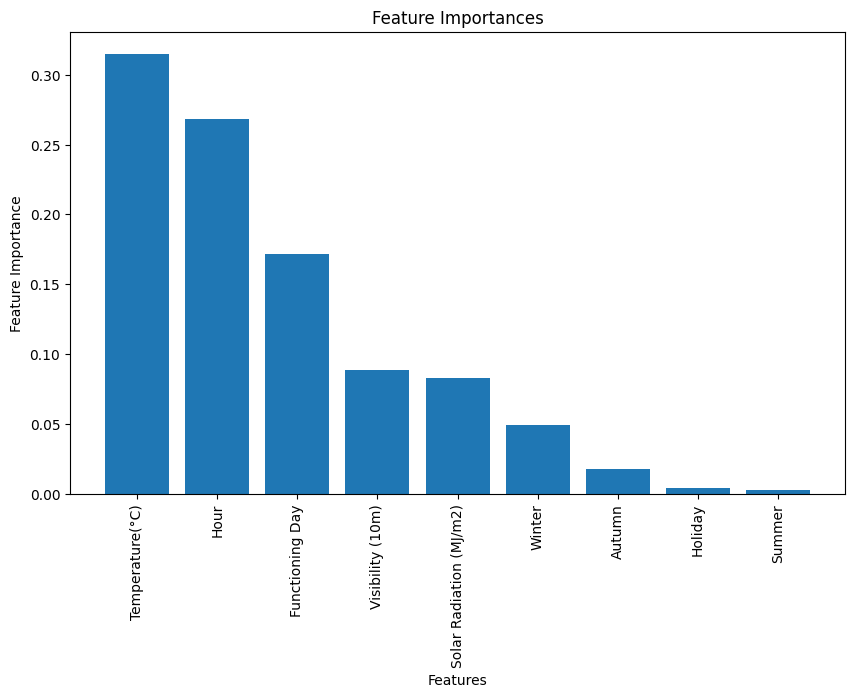

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the already fitted Random Forest model
feature_importances = rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace with your actual feature names

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot all feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()



From the Random Forest (CV) model's feature importance plot, it is evident that temperature, hour of the day, functional day, and visibility are the most important features contributing significantly to the model's predictions.

# **Conclusion**

**EDA insights:**

Seasonal Impact: Summer has the highest percentage of total bike rentals, contributing to 37.0% of all rentals. Autumn and spring have similar percentages, each contributing around 29% and 26.1%, respectively. Winter has the lowest share, with only 7.9%. This suggests a strong seasonal effect on bike rentals.

Holiday vs. Non-Holiday: On average, there is a higher demand for bike rentals on non-holidays (around 700 rentals) compared to holidays (around 500 rentals). This indicates that holidays tend to have lower rental activity.

Temperature Effect: Bike rentals tend to be higher within the temperature range of approximately 20 to 30 degrees Celsius. This suggests a positive relationship between temperature and rentals within this range.

Humidity and Rainfall: Bike rentals peak within a specific humidity range of approximately 40% to 60%, indicating a potential non-linear relationship. Rentals decrease as humidity increases. Additionally, rentals drop when rainfall exceeds 10mm, but there's an unusual peak when rainfall exceeds 20mm, warranting further investigation.

Weather Factors: Wind speed and solar radiation do not appear to significantly impact bike rental counts. Rainfall negatively affects rentals, while snowfall is associated with decreased demand.

Hourly Demand: Rental demand follows a clear pattern throughout the day, with peaks in the morning (around 8 am) and evening (around 6 pm), aligning with office opening and closing times.

**ML Model Findings:**

The ML model results reveal that the Random Forest (CV) model outperforms other models in terms of Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. It achieves an MSE of 28.559, RMSE of 5.344, and an impressive R2 score of 0.812. This indicates that the Random Forest (CV) model provides the best predictive accuracy for bike rentals.From the Random Forest (CV) model's feature importance plot, it is evident that temperature, hour of the day, functional day, and visibility are the most important features contributing significantly to the model's predictions.


In conclusion, the analysis highlights the seasonal, weather-related, and temporal factors affecting bike rentals. The Random Forest (CV) model demonstrates superior predictive performance, making it the preferred choice for forecasting bike rentals. These insights can be valuable for optimizing bike rental services and managing inventory effectively.

**Challenges faced:**

Removing Outliers.

Encoding the categorical columns.

Removing Multicollinearity from the dataset.

Choosing Model explainability technique.
